# 1. Import libraries

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 2. Acquire the data

In [31]:
df=pd.read_csv("ratings.csv")
df.head()

,team_id,Team,Player,Tournament,Matches,Batting Innings,Not Out,Runds Scored,Highest Score,Batting Average,...,Best Bowling Figures,Bowling Average,Bowling Economy Rate,Bowling Strike Rate,4+ Innings Wickets,5+ Innings Wickets,Catches Taken,Stumpings Made,Unnamed: 30,Ratings
0,1,Delhi Daredevils,CH Morris,IPL 2016,12,7,4,195,82*,65,...,Feb-30,23.69,7,20.3,0,0,8,0,NaN,5
1,1,Delhi Daredevils,CH Morris,IPL 2017,9,9,4,154,52*,30.8,...,26-Apr,20,7.74,15.5,1,0,5,0,NaN,5
2,1,Delhi Daredevils,CH Morris,IPL 2018,4,4,3,46,27*,46,...,Feb-41,47.66,10.21,28,0,0,2,0,NaN,5
3,1,Delhi Daredevils,JP Duminy,IPL 2016,10,8,3,191,49*,38.2,...,4-Jan,27.5,7.85,21,0,0,3,0,NaN,5
4,1,Delhi Daredevils,Q de Kock,IPL 2016,13,13,1,445,108,37.08,...,-,-,-,-,-,-,2,2,NaN,5


# 3. Preprocess the data 

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   team_id               631 non-null    int64  
 1   Team                  631 non-null    object 
 2   Player                631 non-null    object 
 3   Tournament            631 non-null    object 
 4   Matches               631 non-null    int64  
 5   Batting Innings       631 non-null    object 
 6   Not Out               631 non-null    object 
 7   Runds Scored          631 non-null    object 
 8   Highest Score         631 non-null    object 
 9   Batting Average       631 non-null    object 
 10  Balls Faced           631 non-null    object 
 11  Batting Strike Rate   631 non-null    object 
 12  100                   631 non-null    object 
 13  50                    631 non-null    object 
 14  0                     631 non-null    object 
 15  4s                    6

In [33]:
df=df[["Team","Player","Tournament","Matches","Ratings","team_id"]]

In [34]:
df.head()

,Team,Player,Tournament,Matches,Ratings,team_id
0,Delhi Daredevils,CH Morris,IPL 2016,12,5,1
1,Delhi Daredevils,CH Morris,IPL 2017,9,5,1
2,Delhi Daredevils,CH Morris,IPL 2018,4,5,1
3,Delhi Daredevils,JP Duminy,IPL 2016,10,5,1
4,Delhi Daredevils,Q de Kock,IPL 2016,13,5,1


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Team        631 non-null    object
 1   Player      631 non-null    object
 2   Tournament  631 non-null    object
 3   Matches     631 non-null    int64 
 4   Ratings     631 non-null    int64 
 5   team_id     631 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 22.2+ KB


In [36]:
df.isna().sum()

Team          0
Player        0
Tournament    0
Matches       0
Ratings       0
team_id       0
dtype: int64

In [37]:
df.describe()

,Matches,Ratings,team_id
count,631.000000,631.000000,631.000000
mean,8.332805,2.795563,5.117274
std,5.055268,1.396497,2.815863
min,1.000000,1.000000,1.000000
25%,4.000000,1.000000,3.000000
50%,8.000000,3.000000,5.000000
75%,13.000000,4.000000,7.000000
max,17.000000,5.000000,11.000000


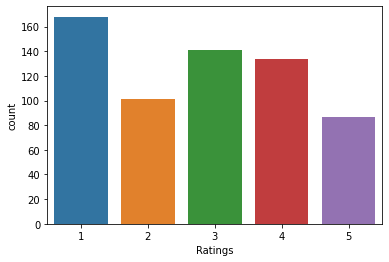

In [38]:
sns.countplot(x="Ratings",data=df)

In [39]:
X=df.drop(["Team","Player","Tournament","Ratings"],axis=1)
y=df["Ratings"]

In [40]:
X

,Matches,team_id
0,12,1
1,9,1
2,4,1
3,10,1
4,13,1
...,...,...
626,6,11
627,12,11
628,7,11
629,8,11


In [41]:
y

0      5
1      5
2      5
3      5
4      5
      ..
626    4
627    4
628    4
629    4
630    4
Name: Ratings, Length: 631, dtype: int64

In [42]:
X.shape

(631, 2)

In [43]:
y.shape

(631,)

# 5. Split the data into training and testing 

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=11)

In [45]:
X_train.shape

(473, 2)

In [46]:
X_test.shape

(158, 2)

In [47]:
y_test.shape

(158,)

In [48]:
y_train.shape

(473,)

In [49]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# 6. Train the model

In [50]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=112)
result=model.fit(X_train,y_train)

In [51]:
y_pred=result.predict(X_test)

In [52]:
y_pred

array([4, 1, 2, 4, 1, 1, 1, 2, 4, 3, 3, 1, 2, 3, 1, 3, 3, 3, 4, 5, 1, 1,
       1, 1, 4, 3, 2, 3, 2, 3, 2, 3, 1, 4, 1, 1, 4, 4, 1, 4, 2, 1, 5, 3,
       1, 5, 1, 2, 3, 3, 4, 3, 1, 3, 1, 1, 1, 5, 5, 3, 4, 1, 3, 3, 2, 3,
       5, 1, 5, 4, 4, 1, 3, 1, 4, 4, 4, 1, 1, 1, 4, 2, 4, 4, 1, 4, 1, 4,
       1, 2, 1, 2, 3, 1, 1, 4, 1, 2, 1, 1, 4, 2, 2, 1, 5, 3, 2, 1, 3, 1,
       1, 1, 1, 1, 5, 3, 1, 5, 2, 1, 1, 5, 1, 5, 3, 3, 2, 3, 1, 3, 4, 3,
       3, 4, 1, 4, 5, 4, 1, 4, 1, 1, 4, 4, 3, 5, 1, 3, 3, 2, 1, 1, 3, 2,
       3, 1, 4, 3], dtype=int64)

# 7. Deploy the model

In [53]:
predictions=result.predict([[10,4]])
predictions
if(predictions[0]==4):
    print("Great Form")
elif (predictions[0]==5):
      print("Excellent form")
elif (predictions[0]==3):
    print("Good form")
elif (predictions[0]==2):
    print("In-form")
elif (predictions[0]==1):
    print("Out of form")

Great Form


In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7278481012658228

In [55]:
import tkinter as tk

root= tk.Tk()

canvas1 = tk.Canvas(root, width = 400, height = 200,  relief = 'raised')
canvas1.pack()

label1 = tk.Label(root, text='Get the Ratings:')
label1.config(font=('helvetica', 14))
canvas1.create_window(200, 25, window=label1)

label2 = tk.Label(root, text='Enter the number of matches played:')
label2.config(font=('helvetica', 10))
canvas1.create_window(200, 100, window=label2)

entry1 = tk.Entry (root) 
canvas1.create_window(200, 150, window=entry1)


canvas2 = tk.Canvas(root, width = 400, height = 100,  relief = 'raised')
canvas2.pack()


label4 = tk.Label(root, text='Enter the Team ID:')
label4.config(font=('helvetica', 10))
canvas2.create_window(200, 10, window=label4)

entry2 = tk.Entry (root) 
canvas2.create_window(200, 50, window=entry2)




def Score ():
    
    x1 = entry1.get()
    x2=entry2.get()
    
    # Testing with a custom input
    import numpy as np
    new_prediction = result.predict(sc.transform(np.array([[x1,x2]])))

    word=str(new_prediction[0])
    words="Predicted Rating of player is:"+word
   
    
    label1 = tk.Label(root, text=words,font=('helvetica', 13, 'bold'))
    canvas2.create_window(200, 113, window=label1)
    
button1 = tk.Button(text='Get the Predicted Rating', command=Score, bg='brown', fg='white', font=('helvetica', 10, 'bold'))
canvas2.create_window(200, 90, window=button1)

root.mainloop()
    
    
    
    
    


In [56]:
def predictRating(number1,number2):
    import numpy as np
    answer = result.predict(sc.transform(np.array([[number1,number2]])))
    return answer[0]
